## Things to do:
1. Combine result files into a single file
2. Draw graphs

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import numpy as np
import pandas as pd
os.chdir('./..')

bench_run_folder = f"./runs/bench/CHASE/"
qent_run_folder = f"./runs/QENT/"

def get_final_run_file(dir_path: str):
    final_files = []
    for run_dir in os.listdir(dir_path):
        max = 0
        file = None
        for file in os.listdir(os.path.join(dir_path, run_dir)):
            run_number = int(file.split('_')[-1].split('.')[0])
            if run_number > max:
                run_file = os.path.join(os.path.join(dir_path, run_dir), file)
        final_files.append(run_file)

    return pd.concat([pd.read_csv(i) for i in final_files])

def get_common_questions(
    dfs: list[pd.DataFrame]
):

    # Find the intersection of 'question_id' across all DataFrames
    common_ids = set(dfs[0]['question_id'])
    for df in dfs[1:]:
        common_ids.intersection_update(df['question_id'])

    # Filter each DataFrame to keep only the common 'question_id's
    return [df[df['question_id'].isin(common_ids)] for df in dfs]

benchmark_results = get_final_run_file(bench_run_folder)
qent_results = get_final_run_file(qent_run_folder)

In [2]:
filtered_results = get_common_questions([benchmark_results, qent_results])
filtered_benchmark_results = filtered_results[0]
filtered_qent_results = filtered_results[1]

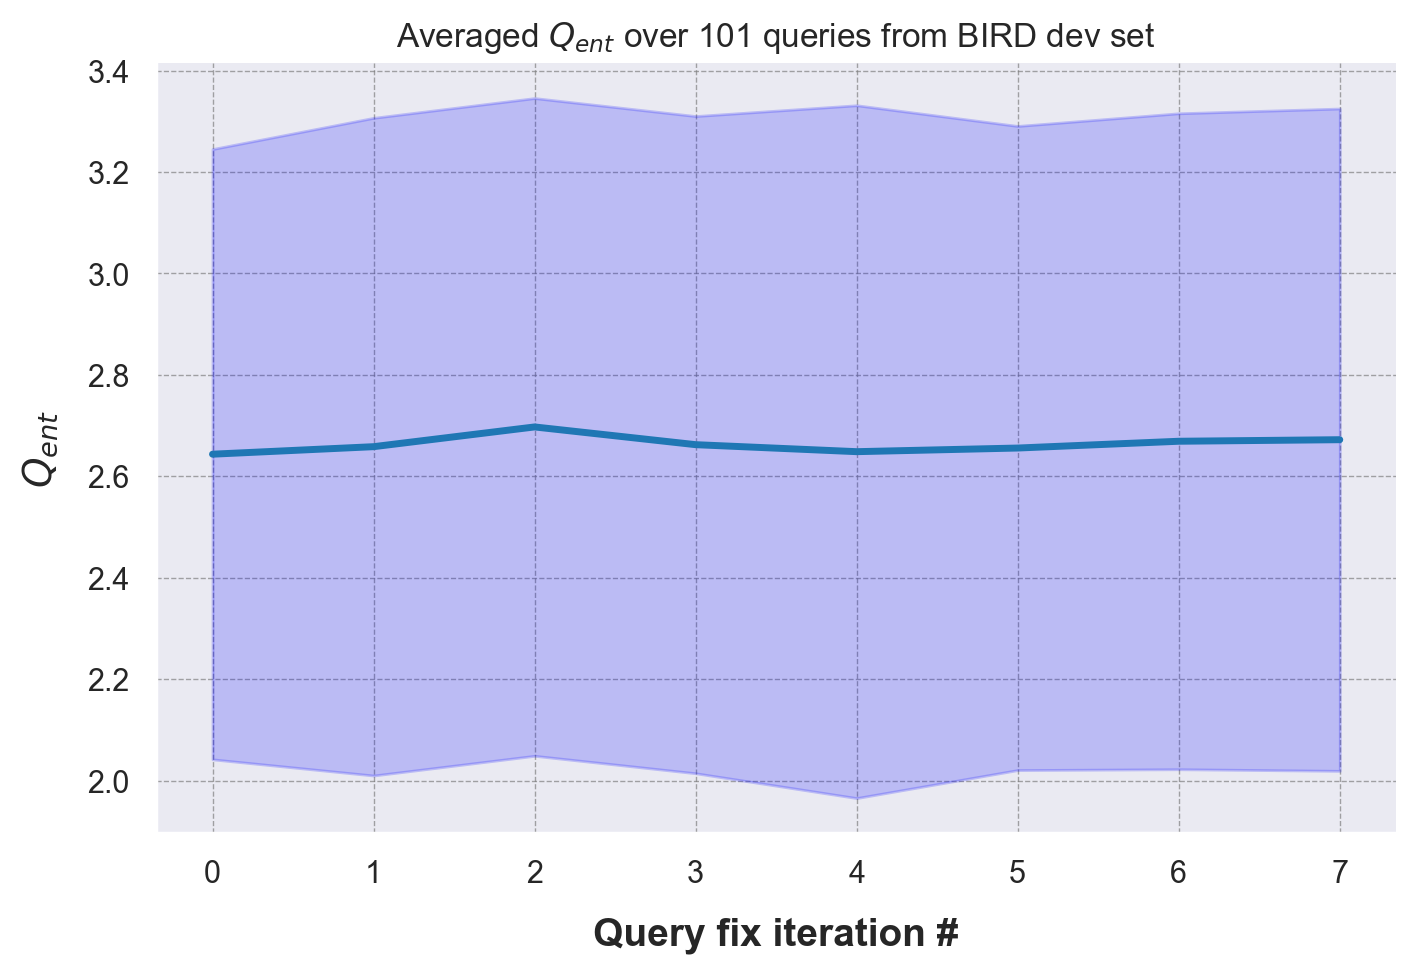

In [3]:
qents = []
for qent_result in filtered_qent_results['Query entropies during fix']:
    qents.append(ast.literal_eval(qent_result))

averaged_qents = np.mean(qents, axis=0).tolist()
std_qents = np.std(qents, axis=0)

# plt.style.use("")
sns.set_theme(style="darkgrid")

plt.figure(figsize=(8, 5), dpi=200) 

plt.plot(averaged_qents, color="#1f77b4", linewidth=2.5, linestyle='-')
plt.fill_between(range(len(averaged_qents)), averaged_qents - std_qents, averaged_qents + std_qents, color="blue", alpha=0.2, label="Std Dev")

plt.xlabel("Query fix iteration #", fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('$Q_{ent}$', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Averaged $Q_{ent}$ over 101 queries from BIRD dev set')

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

In [28]:
filtered_qent_results['Method-cluster-distribution'].map(lambda x: ast.literal_eval(x)).tolist()


[[{0: {'DAC': 1.0},
   1: {'QP': 1.0},
   2: {'SYNTH': 1.0},
   3: {'DAC': 1.0},
   4: {'SYNTH': 1.0},
   5: {'DAC': 1.0},
   6: {'SYNTH': 1.0},
   7: {'DAC': 1.0},
   8: {'SYNTH': 1.0}},
  {0: {'DAC': 1.0},
   1: {'QP': 1.0},
   2: {'SYNTH': 1.0},
   3: {'DAC': 1.0},
   4: {'DAC': 1.0},
   5: {'DAC': 1.0},
   6: {'SYNTH': 1.0}},
  {0: {'DAC': 1.0},
   1: {'QP': 0.5, 'SYNTH': 0.5},
   2: {'SYNTH': 1.0},
   3: {'DAC': 1.0},
   4: {'DAC': 1.0},
   5: {'SYNTH': 1.0},
   6: {'DAC': 1.0},
   7: {'SYNTH': 1.0}},
  {0: {'DAC': 1.0},
   1: {'QP': 1.0},
   2: {'SYNTH': 1.0},
   3: {'DAC': 1.0},
   4: {'SYNTH': 1.0},
   5: {'DAC': 1.0},
   6: {'DAC': 1.0},
   7: {'SYNTH': 1.0}},
  {0: {'DAC': 1.0},
   1: {'QP': 1.0},
   2: {'SYNTH': 1.0},
   3: {'DAC': 1.0},
   4: {'SYNTH': 1.0},
   5: {'DAC': 1.0},
   6: {'SYNTH': 1.0},
   7: {'DAC': 1.0},
   8: {'SYNTH': 1.0}},
  {0: {'DAC': 1.0},
   1: {'QP': 1.0},
   2: {'SYNTH': 1.0},
   3: {'DAC': 1.0},
   4: {'SYNTH': 1.0},
   5: {'DAC': 1.0},
   6: {'DAC

<Figure size 1600x1000 with 0 Axes>

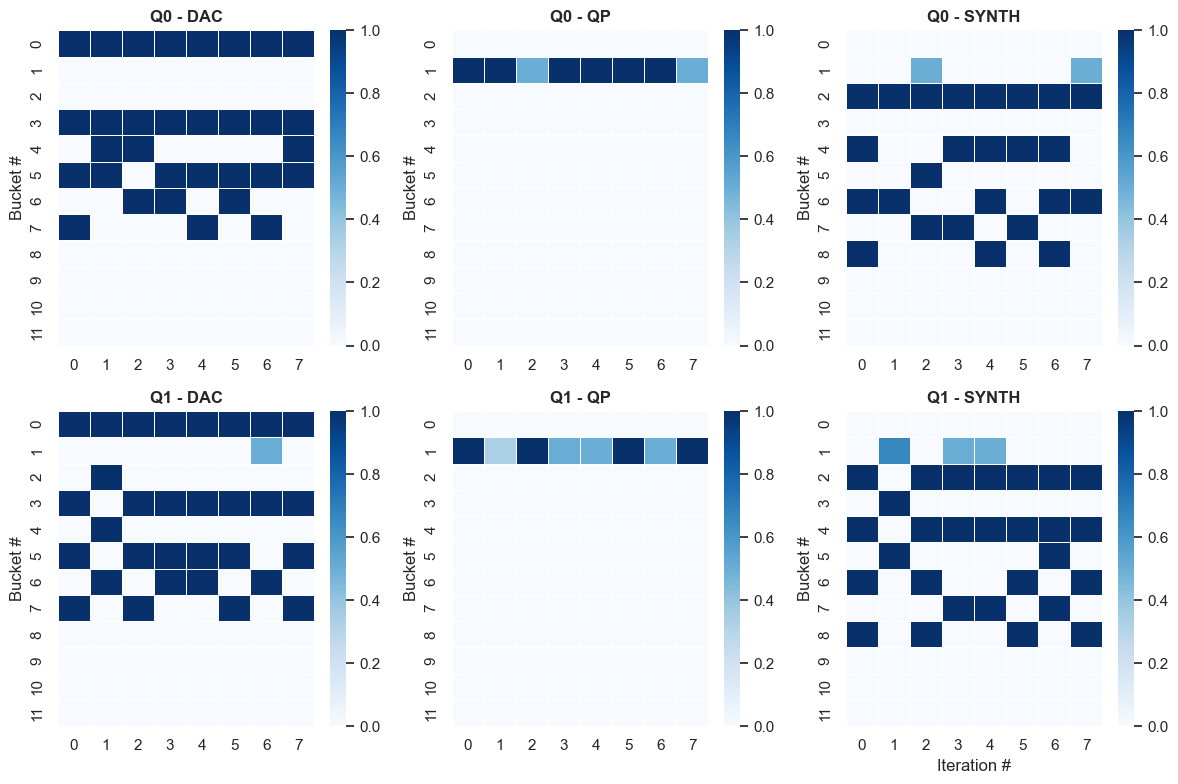

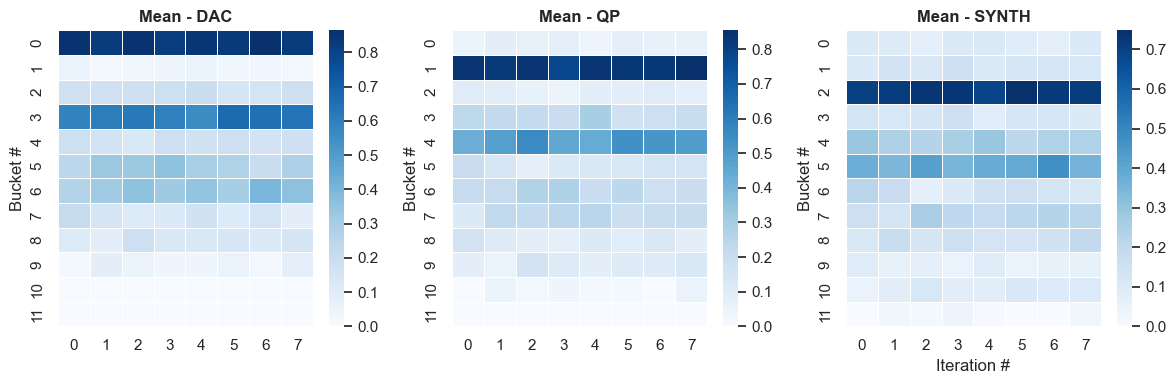

In [30]:
# Example Data (Replace with actual data)
data = filtered_qent_results['Method-cluster-distribution'].map(lambda x: ast.literal_eval(x)).tolist()

# Extract metadata
num_questions = len(data)
num_iterations = max(len(q) for q in data)
num_buckets = max(max(d.keys()) for q in data for d in q) + 1

# Methods to visualize
methods = ['DAC', 'QP', 'SYNTH']

# Heatmap storage
mean_heatmaps = {m: np.zeros((num_buckets, num_iterations)) for m in methods}

sns.set_theme(style="darkgrid")

plt.figure(figsize=(8, 5), dpi=200) 
# Individual Heatmaps
selected_questions = [0, 1]  # Choose which questions to visualize individually
fig, axes = plt.subplots(len(selected_questions), len(methods), figsize=(12, 8))

for q_idx, q in enumerate(selected_questions):
    heatmaps = {m: np.zeros((num_buckets, num_iterations)) for m in methods}
    
    for i, iteration_data in enumerate(data[q]):
        for bucket, method_dict in iteration_data.items():
            for method, percentage in method_dict.items():
                heatmaps[method][bucket, i] = percentage  # Direct values for individual heatmaps
    
    for j, method in enumerate(methods):
        sns.heatmap(heatmaps[method], ax=axes[q_idx, j], cmap="Blues", cbar=True, linewidths=0.5, annot=False)
        axes[q_idx, j].set_title(f"Q{q} - {method}", fontsize=12, fontweight="bold")
        axes[q_idx, j].set_ylabel("Bucket #")
        
axes[-1, -1].set_xlabel("Iteration #")
plt.tight_layout()
plt.show()

# Mean Heatmap Calculation
for q in data:
    for i, iteration_data in enumerate(q):
        for bucket, method_dict in iteration_data.items():
            for method, percentage in method_dict.items():
                mean_heatmaps[method][bucket, i] += percentage / num_questions  # Averaging

# Mean Heatmap Visualization
fig, axes = plt.subplots(1, len(methods), figsize=(12, 4))

for j, method in enumerate(methods):
    sns.heatmap(mean_heatmaps[method], ax=axes[j], cmap="Blues", cbar=True, linewidths=0.5, annot=False)
    axes[j].set_title(f"Mean - {method}", fontsize=12, fontweight="bold")
    axes[j].set_ylabel("Bucket #")

axes[-1].set_xlabel("Iteration #")
plt.tight_layout()
plt.show()

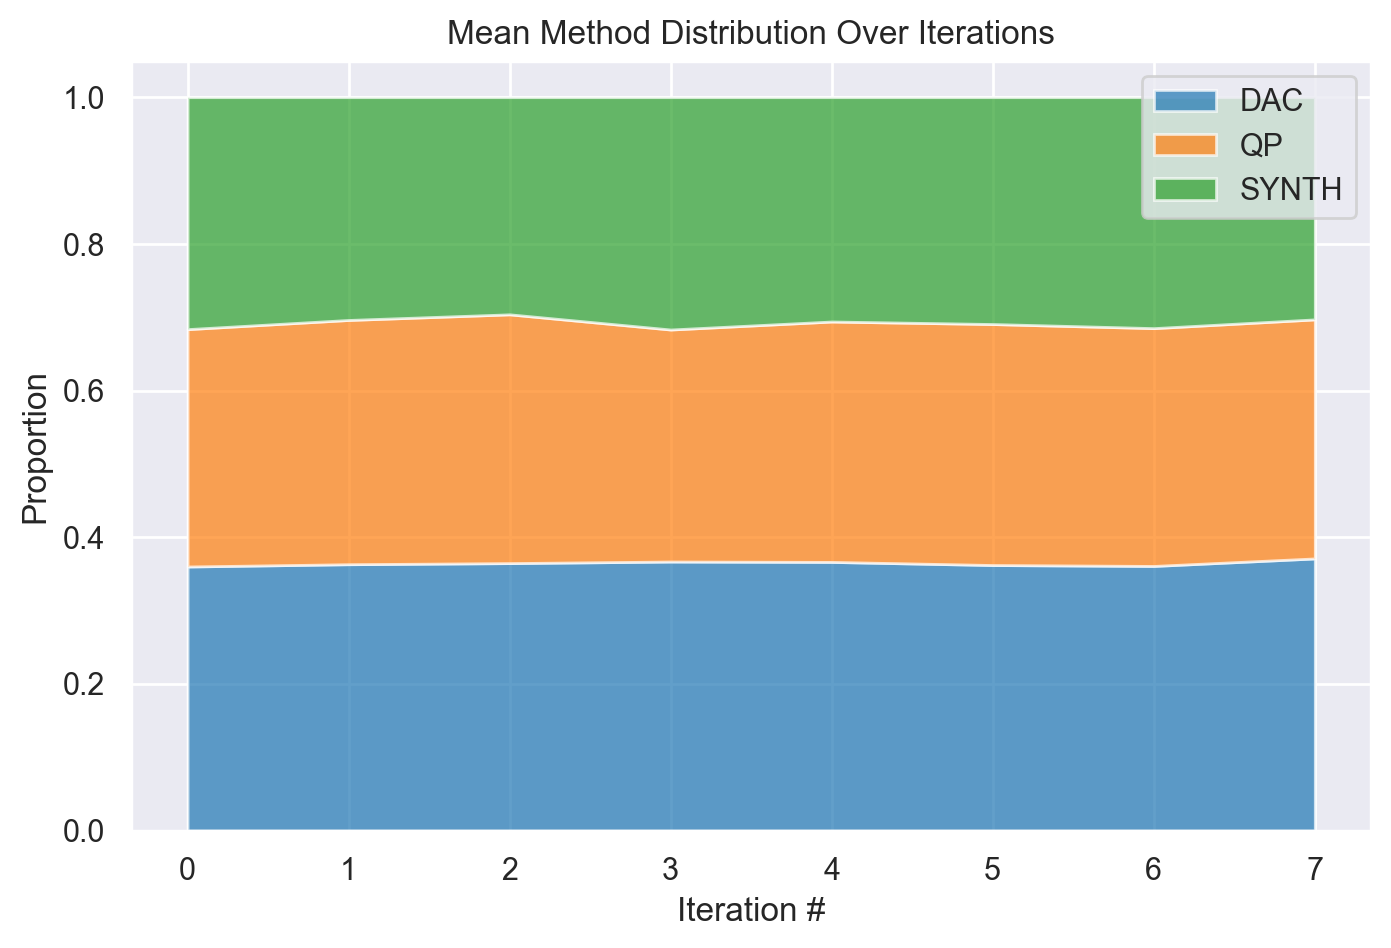

In [31]:
num_questions = len(data)
num_iterations = max(len(q) for q in data)
methods = ['DAC', 'QP', 'SYNTH']

# Compute mean distribution per iteration
mean_distributions = {m: np.zeros(num_iterations) for m in methods}

for q in data:
    for i, iteration_data in enumerate(q):
        bucket_counts = {m: 0 for m in methods}
        total_buckets = 0
        
        for bucket, method_dict in iteration_data.items():
            for method, percentage in method_dict.items():
                bucket_counts[method] += percentage
            total_buckets += 1

        for method in methods:
            mean_distributions[method][i] += bucket_counts[method] / total_buckets / num_questions  # Normalize

# Plot stacked area chart
fig, ax = plt.subplots(figsize=(8, 5), dpi=200)
x = np.arange(num_iterations)

ax.stackplot(x, mean_distributions['DAC'], mean_distributions['QP'], mean_distributions['SYNTH'], 
             labels=['DAC', 'QP', 'SYNTH'], colors=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)

ax.legend(loc='upper right')
ax.set_xlabel("Iteration #")
ax.set_ylabel("Proportion")
ax.set_title("Mean Method Distribution Over Iterations")

plt.show()

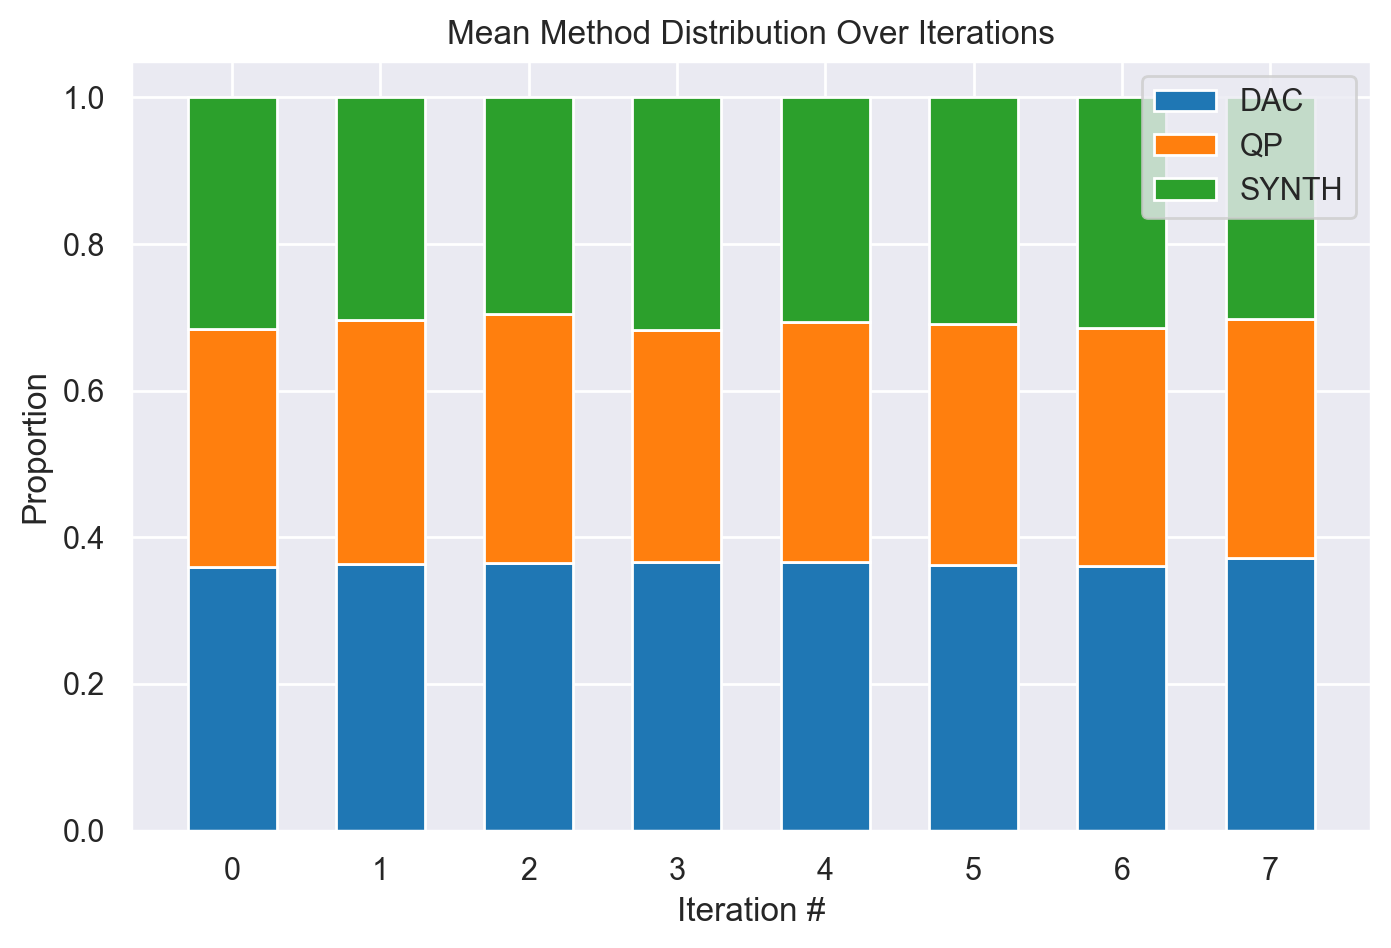

In [35]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=200)

width = 0.6  # Bar width
x = np.arange(num_iterations)

ax.bar(x, mean_distributions['DAC'], width, label='DAC', color='#1f77b4')
ax.bar(x, mean_distributions['QP'], width, bottom=mean_distributions['DAC'], label='QP', color='#ff7f0e')
ax.bar(x, mean_distributions['SYNTH'], width, 
       bottom=np.array(mean_distributions['DAC']) + np.array(mean_distributions['QP']), 
       label='SYNTH', color='#2ca02c')

ax.set_xlabel("Iteration #")
ax.set_ylabel("Proportion")
ax.set_title("Mean Method Distribution Over Iterations")
ax.legend()

plt.show()

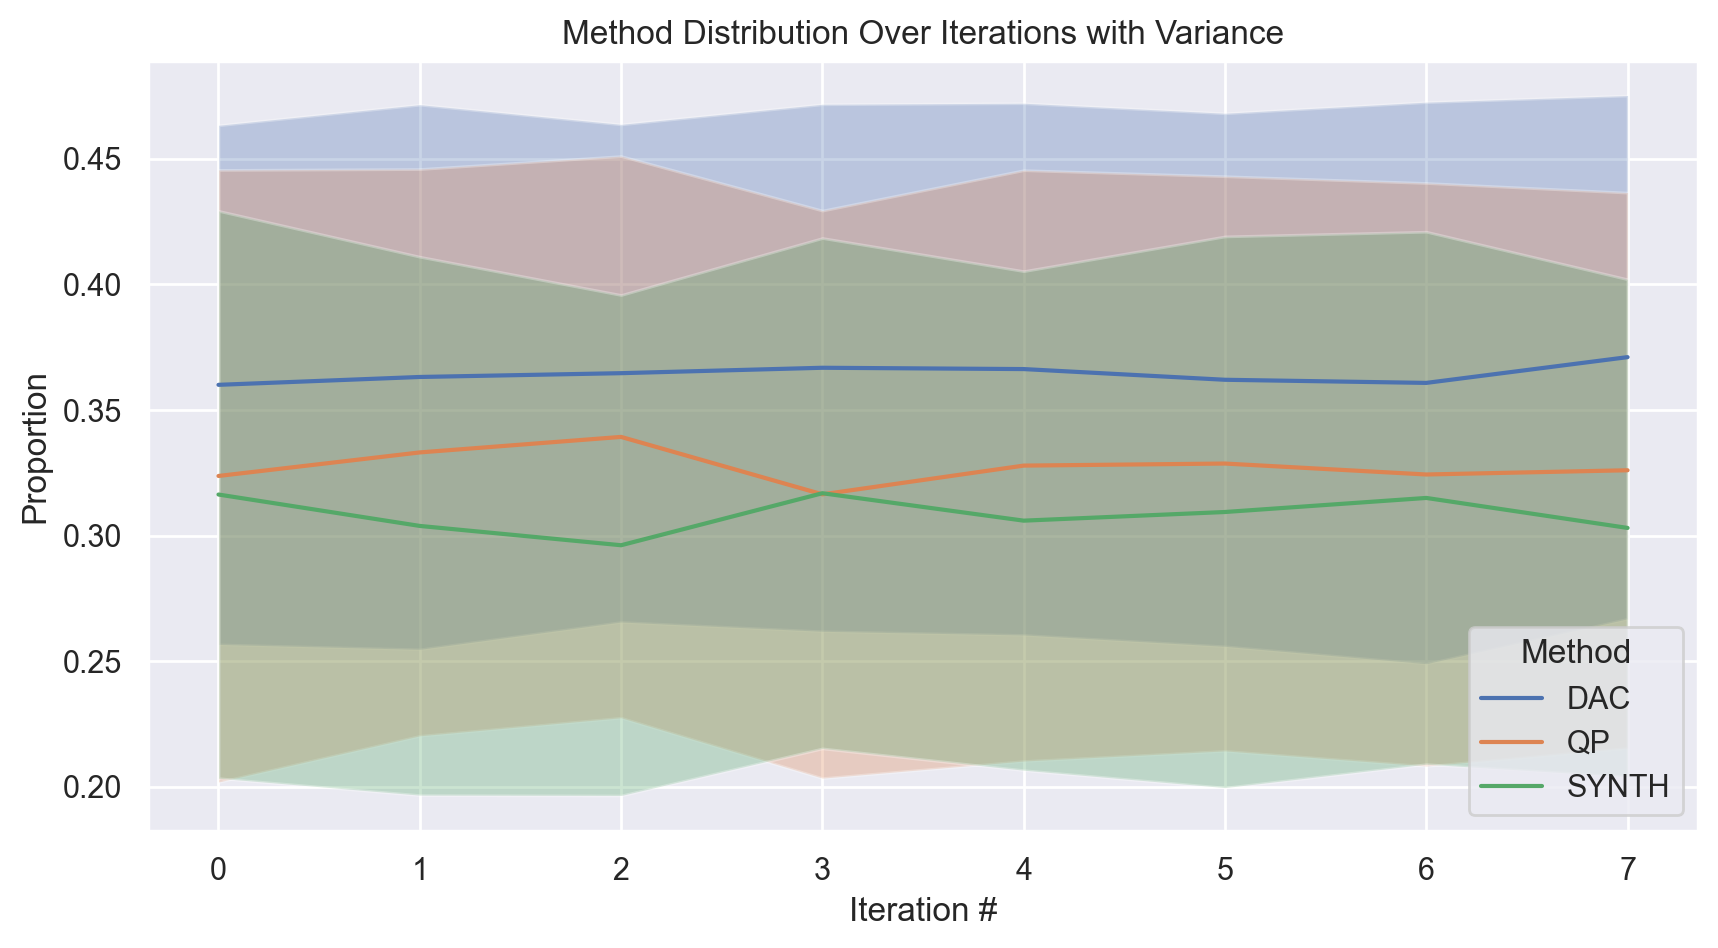

In [36]:
method_distributions = {m: np.zeros(num_iterations) for m in methods}

for q in data:
    for i, iteration_data in enumerate(q):
        method_totals = {m: 0 for m in methods}
        for bucket_data in iteration_data.values():
            for method, percentage in bucket_data.items():
                method_totals[method] += percentage
        # Normalize per iteration
        total = sum(method_totals.values())
        for method in methods:
            method_distributions[method][i] += (method_totals[method] / total) / num_questions

# Compute standard deviation per method across all questions
method_std = {m: np.zeros(num_iterations) for m in methods}

for q in data:
    for i, iteration_data in enumerate(q):
        method_totals = {m: 0 for m in methods}
        for bucket_data in iteration_data.values():
            for method, percentage in bucket_data.items():
                method_totals[method] += percentage
        total = sum(method_totals.values())
        for method in methods:
            method_std[method][i] += ((method_totals[method] / total) - method_distributions[method][i]) ** 2

for method in methods:
    method_std[method] = np.sqrt(method_std[method] / num_questions)

plt.figure(figsize=(10, 5), dpi=200)
for method in methods:
    plt.plot(range(num_iterations), method_distributions[method], label=method)
    plt.fill_between(range(num_iterations),
                     method_distributions[method] - method_std[method],
                     method_distributions[method] + method_std[method],
                     alpha=0.3)

plt.xlabel("Iteration #")
plt.ylabel("Proportion")
plt.legend(title="Method")
plt.title("Method Distribution Over Iterations with Variance")
plt.show()

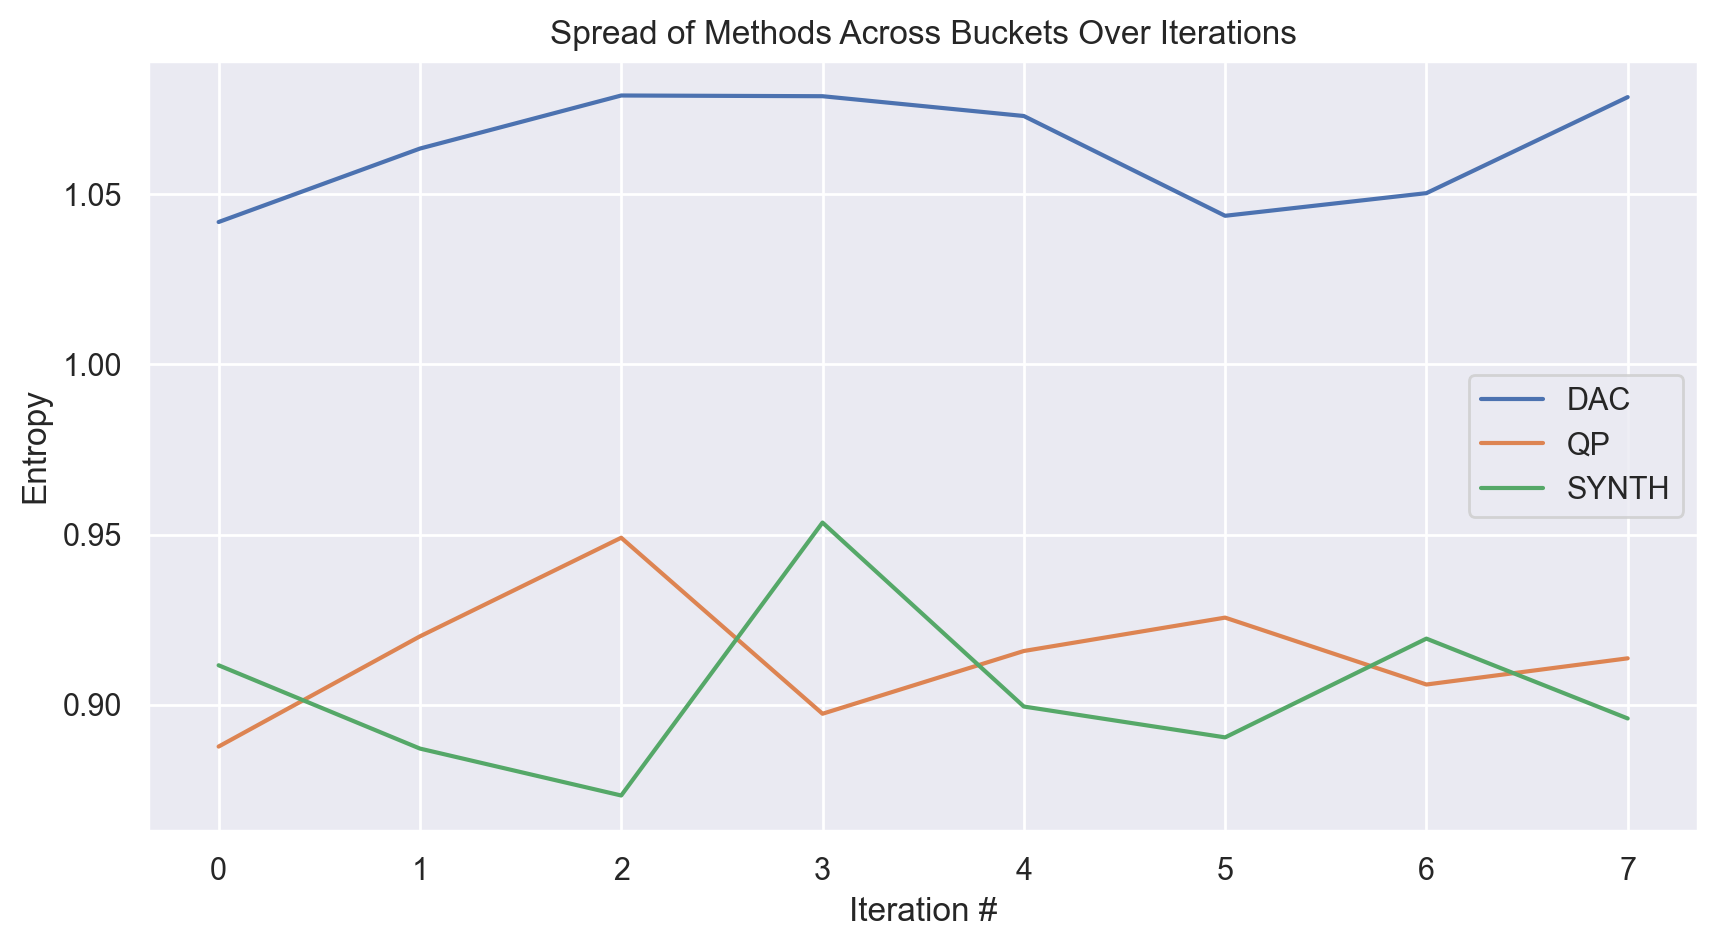

In [37]:
from scipy.stats import entropy

num_questions = len(data)
num_iterations = max(len(q) for q in data)
methods = ['DAC', 'QP', 'SYNTH']

# Store entropy values
method_entropy = {m: np.zeros(num_iterations) for m in methods}

for q in data:
    for i, iteration_data in enumerate(q):
        method_buckets = {m: [] for m in methods}

        for bucket_data in iteration_data.values():
            for method, percentage in bucket_data.items():
                method_buckets[method].append(percentage)

        for method in methods:
            if method_buckets[method]:  # Avoid empty buckets
                prob_dist = np.array(method_buckets[method])
                prob_dist /= prob_dist.sum()  # Normalize to sum to 1
                method_entropy[method][i] += entropy(prob_dist)

for method in methods:
    method_entropy[method] /= num_questions  # Average across questions

# Plot entropy over iterations
plt.figure(figsize=(10, 5), dpi=200)
for method in methods:
    plt.plot(range(num_iterations), method_entropy[method], label=method)

plt.xlabel("Iteration #")
plt.ylabel("Entropy")
plt.title("Spread of Methods Across Buckets Over Iterations")
plt.legend()
plt.show()

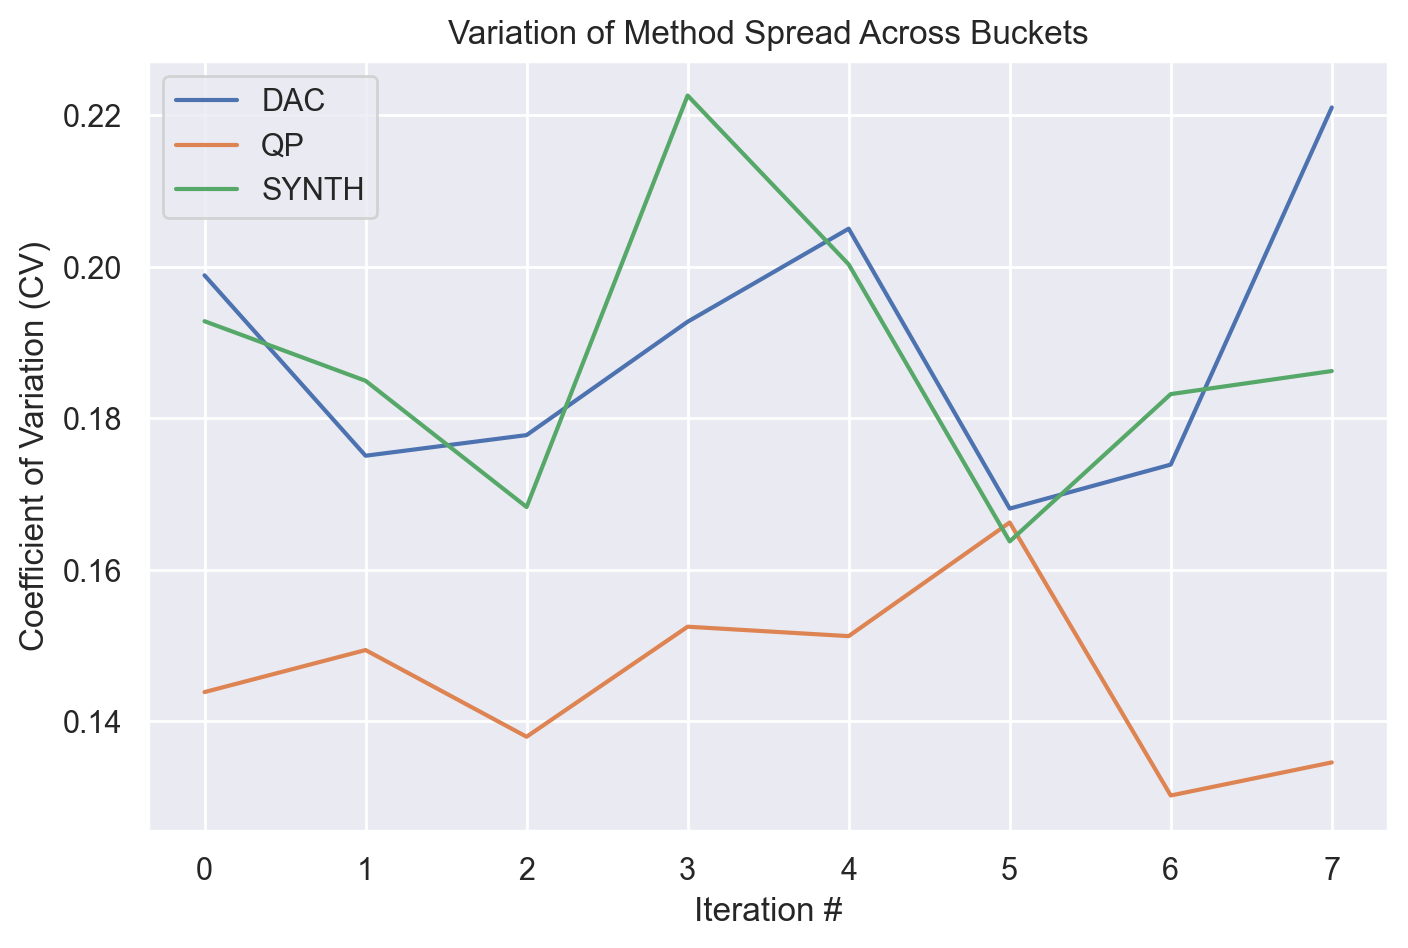

In [39]:
method_cv = {m: np.zeros(num_iterations) for m in methods}

for q in data:
    for i, iteration_data in enumerate(q):
        method_buckets = {m: [] for m in methods}

        for bucket_data in iteration_data.values():
            for method, percentage in bucket_data.items():
                method_buckets[method].append(percentage)

        for method in methods:
            if method_buckets[method]:  # Avoid empty lists
                values = np.array(method_buckets[method])
                method_cv[method][i] += np.std(values) / np.mean(values)

for method in methods:
    method_cv[method] /= num_questions  # Average over questions

# Plot CV over iterations
plt.figure(figsize=(8, 5), dpi=200)
for method in methods:
    plt.plot(range(num_iterations), method_cv[method], label=method)

plt.xlabel("Iteration #")
plt.ylabel("Coefficient of Variation (CV)")
plt.title("Variation of Method Spread Across Buckets")
plt.legend()
plt.show()

In [40]:
# If CV drops, methods are spreading more evenly.
# If CV stays high, methods are stuck in a few buckets.

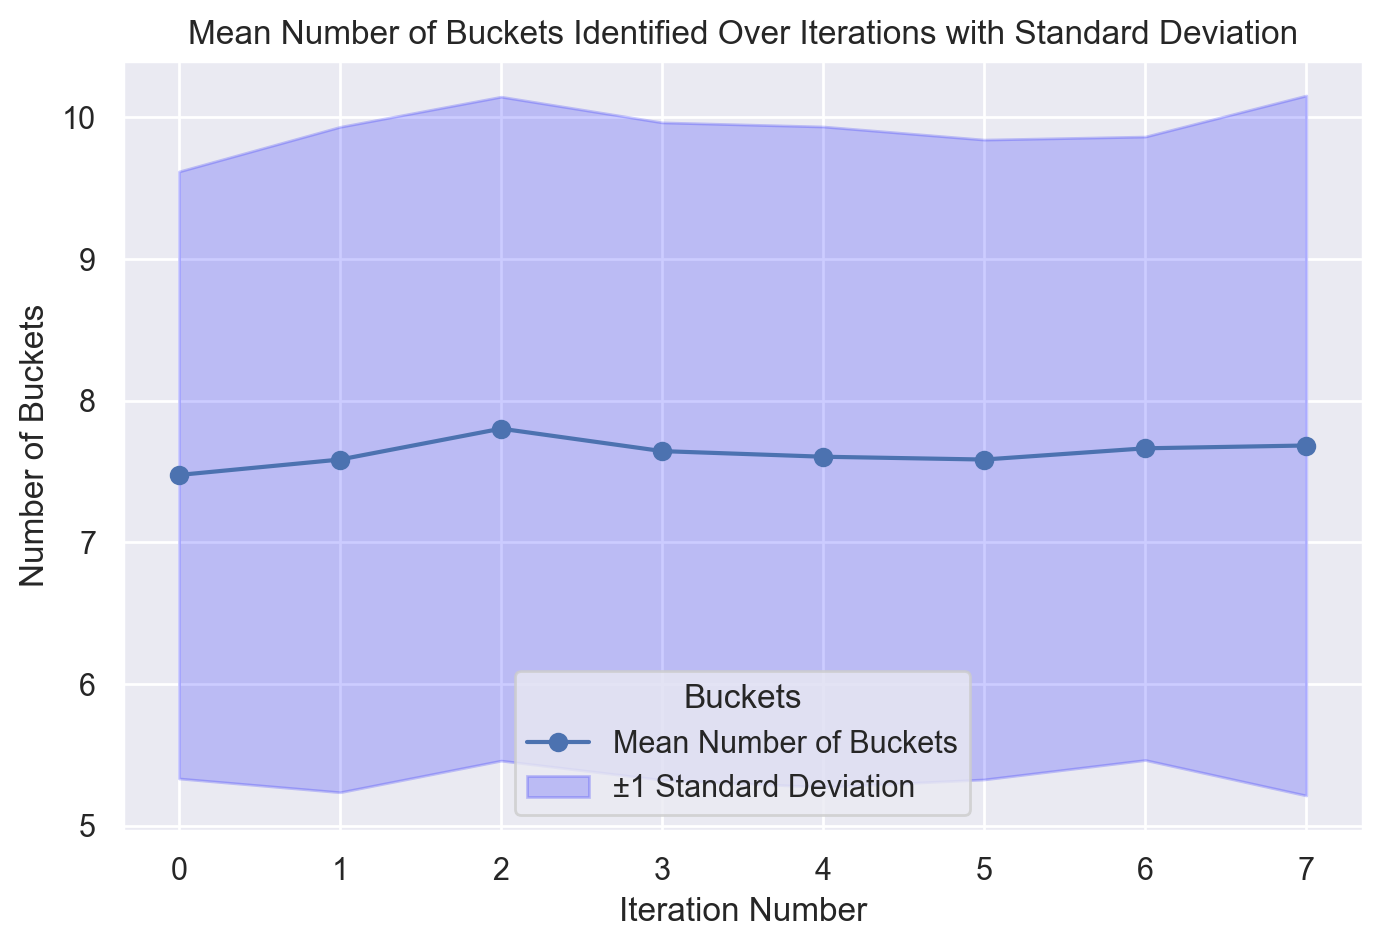

In [46]:
import matplotlib.pyplot as plt

# List to store number of buckets per iteration for each question
bucket_counts = []

# Process data to extract number of unique buckets per iteration for each question
for question in data:
    question_bucket_counts = []
    for iteration in question:
        bucket_count = len(iteration)
        question_bucket_counts.append(bucket_count)
    bucket_counts.append(question_bucket_counts)

# Convert the bucket counts to a numpy array for easier calculations
bucket_counts_array = np.array(bucket_counts)

# Calculate the mean and standard deviation across questions at each iteration
mean_buckets = bucket_counts_array.mean(axis=0)
std_buckets = bucket_counts_array.std(axis=0)

# Plotting the line graph with shaded area for standard deviation
plt.figure(figsize=(8, 5), dpi=200)

# Plot the mean line
plt.plot(range(len(mean_buckets)), mean_buckets, marker='o', label='Mean Number of Buckets', color='b')

# Fill the area between mean ± standard deviation
plt.fill_between(range(len(mean_buckets)), mean_buckets - std_buckets, mean_buckets + std_buckets, color='blue', alpha=0.2, label='±1 Standard Deviation')

# Customizing the plot
plt.title('Mean Number of Buckets Identified Over Iterations with Standard Deviation')
plt.xlabel('Iteration Number')
plt.ylabel('Number of Buckets')
plt.legend(title='Buckets')
plt.grid(True)
plt.xticks(range(len(mean_buckets)))  # Ensure x-ticks align with the number of iterations

# Show plot
plt.show()

In [99]:
import re

# Your input string (abbreviated for clarity)
input_string = filtered_qent_results['Intermediate_queries_and_results_during_fix'].iloc[1]

# Function to preprocess the string
def preprocess_string(input_string):
    # Escape any unescaped double quotes within strings (i.e., SQL queries)
    input_string = re.sub(r'\"([^"]*)\"', r'"\1"', input_string)  # Ensuring the double quotes are properly handled
    
    # Regex pattern to match custom objects like OperationalError
    def replace_custom_objects(match):
        if match.group(0).startswith("OperationalError"):
            # Escape double quotes inside the error message to ensure proper string format
            error_message = match.group(1).replace('"', '\\"')
            return f"\"OperationalError: {error_message}\""
        return match.group(0)
    
    # Replace OperationalError objects and similar
    processed_string = re.sub(r"\b[A-Za-z0-9_]+Error\('([^']+)'\)", replace_custom_objects, input_string)
    
    return processed_string

# Apply preprocessing to the input string
processed_string = preprocess_string(input_string)

# Try to safely evaluate the string into a dictionary
# try:
    parsed_dict = ast.literal_eval(processed_string)
    print(parsed_dict)
except Exception as e:
    print(f"Error parsing string: {e}")

Error parsing string: malformed node or string on line 1: <ast.Call object at 0x0000013EB8A628F0>


In [75]:

pprint(filtered_qent_results['Intermediate_queries_and_results_during_fix'].iloc[5])

('{0: [("\\nSELECT \'T1\'.\'City\' FROM \'schools\' AS \'T1\' \\nWHERE '
 "'T1'.'EILName' = 'High School' \\nAND 'T1'.'County' = 'Merced' \\nAND "
 "'T1'.'School' IN (\\n    SELECT 'School' \\n    FROM 'frpm' \\n    WHERE "
 "NSLP Provision Status = 'Lunch Provision 2' \\n    AND 'lowest grade' = 9 "
 '\\n    AND \'highest grade\' = 12\\n)\\n", OperationalError(\'near '
 '"Provision": syntax error\')), ("\\nSELECT T2.city\\nFROM schools AS '
 'T1\\nINNER JOIN school_locations AS T2 ON T1.id_school = '
 "T2.id_school\\nWHERE T1.EILCode = 'HS' AND T1.Lunch_Provision = 2 AND "
 'T1.Lowest_Grade = 9 AND T1.Highest_Grade = 12 AND T2.county = '
 '\'Merced\';\\n", OperationalError(\'unrecognized token: "```"\')), '
 '("\\nSELECT City\\nFROM california_schools.schools\\nJOIN frpm ON '
 "california_schools.schools.School = frpm.School Name\\nWHERE EILName = 'High "
 "School' AND SOCType = 'Preschool' AND County = 'Merced' AND AdmFName1 = "
 "'Goode' AND AdmLName1 = 'Goode' AND EILCode = 'HS' AN